# Twitter API

Twitter API v2

In [28]:
# Instalação das bibliotecas
%pip install pandas --quiet
%pip install tweepy --quiet
%pip install wordcloud --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\Thunder\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\Thunder\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\Thunder\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [29]:
# Importando as bibliotecas
import tweepy                 as tw
import numpy                  as np
import pandas                 as pd
import matplotlib.pyplot      as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
from os import path
import random
from scipy.ndimage import gaussian_gradient_magnitude

In [30]:
# Autenticação
consumer_key = 'Suas chaves'
consumer_secret = 'Suas chaves'
access_token = 'Suas chaves'
access_token_secret = 'Suas chaves'

In [31]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [32]:
# Testing with a small set of data
query = "Python" + " -filter:retweets"
tweets = tw.Cursor(api.search_tweets,
                       q=query).items(10)
for tweet in tweets:
  print(tweet.text)

@v_xtra Portal #3 1/1 generative art / processing4 + python
5 xtz
https://t.co/asjdjQI9Tc https://t.co/fkDBvJ7kif
Avec toi tu aimes les #datasciences et #python tu vas aimer cette antisèche
🎉Excited to share new video on data engineering!!

https://t.co/pZveItN0j1 https://t.co/THfTu0s4Id
More Complete Chondro, the bestselling manual for all Green Tree Python keepers LPF9HIZ

https://t.co/m3WLP86yBF https://t.co/Svfj0VKlsu
I give 1:1 free consultations on 

→ Python 
→ Data Science
→  Software Engineering
→  Twitter Growth

I charge 50$… https://t.co/gfa3zfTNOf
Video Lucu || Ular Piton Cari Mangsa || Giant Python Prank https://t.co/FyD6A7bSet via @YouTube
@PamelaHensley22 Money Python is still around. I have not seen anything from them in decades. I assumed they were all dead.
@nypost Well, now I know there's at least one good Python.
インフラ弄ってるときが一番たのしいかも
@python_lady 好きー


In [33]:
# Criando um dicionario vazio para guardar os dados
twkeys = tweet._json.keys()
tweets_dict = {}
tweets_dict = tweets_dict.fromkeys(twkeys)

In [34]:
# Procurando x mil tweets e guardando no banco de dados
query = "Python" + " -filter:retweets"
tweets = tw.Cursor(api.search_tweets,
                       q=query).items(450)
for tweet in tweets:
  for key in tweets_dict.keys():
    try:
      twkey = tweet._json[key]
      tweets_dict[key].append(twkey)
    except KeyError:
      twkey = ""
      tweets_dict[key].append("")
    except:
      tweets_dict[key] = [twkey]

In [35]:
# Criando um dat-frame de um dicionario
df0 = pd.DataFrame.from_dict(tweets_dict)
df0.head(5)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,Wed Nov 23 12:18:55 +0000 2022,1595391441785786369,1595391441785786369,@v_xtra Portal #3 1/1 generative art / process...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.595376e+18,1595375847325970432,...,None,None,None,None,False,0,0,False,False,en
1,Wed Nov 23 12:18:50 +0000 2022,1595391419509866496,1595391419509866496,Avec toi tu aimes les #datasciences et #python...,False,"{'hashtags': [{'text': 'datasciences', 'indice...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""http://twitter.com/oorhip"" rel=""nofol...",NaN,None,...,None,None,None,None,False,0,0,False,False,fr
2,Wed Nov 23 12:18:41 +0000 2022,1595391385431330816,1595391385431330816,🎉Excited to share new video on data engineerin...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,None,None,None,False,0,0,False,False,en
3,Wed Nov 23 12:18:35 +0000 2022,1595391359900422146,1595391359900422146,"More Complete Chondro, the bestselling manual ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,None,None,None,False,0,0,False,False,en
4,Wed Nov 23 12:18:28 +0000 2022,1595391329798082562,1595391329798082562,I give 1:1 free consultations on \n\n→ Python ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,None,None,None,False,0,0,False,False,en


In [36]:
# Criando um loop de string com todos os  tweets pegos
df2 = df0.dropna(subset=['text'], axis = 0)['text'].copy()
text = " ".join(s for s in df2)
# Checando para ver quantas palavras tem
print("Words: {}".format(len(text)))


Words: 46687


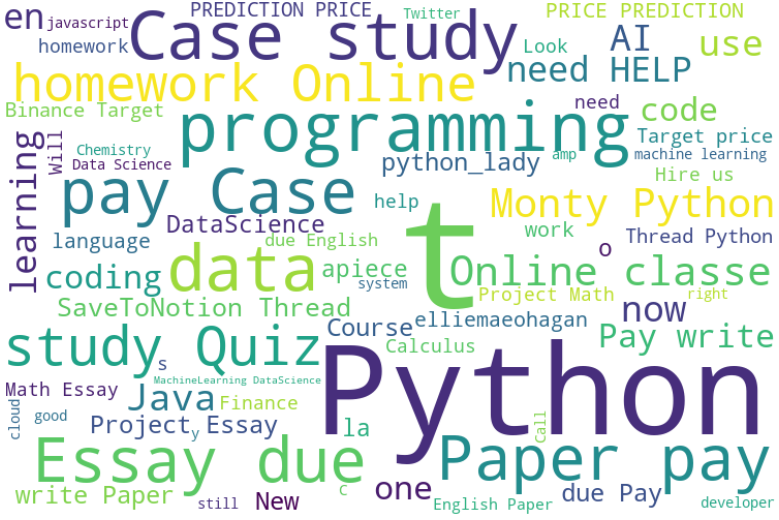

In [37]:
# colocando as stopwords stopwords
stopwords = set(STOPWORDS)
stopwords.update(["é","e", "RT", "da", "fez", "deu", "mai", "ser", "tanto", "Deu", "até", "aos", "fazer", "isso", "muito", "tinha", "usaria", "contra", "pera", "meu", "em", "você", "de", "ao", "os", "não", "feira", "na", "que", "eu", "https", "co", "camisa", "pro", "hora","sport", "ceara", "ceará", "tem", "se", "um", "uma", "que", "foi", "está", "aqui,", "para", "vai", "ter", "mas", "já", "nos", "vem", "sobre", "sendo", "dia", "ver","por", "nossa", "quem", "toda", "tambem", "mais", "sem", "seja", "era", "São", "Paulo", "tá", "pelo", "só", "faz", "pode", "hoje", "nem", "para","depende", "vc", "ele", "ante", "ainda", "assim", "meio", "mesmo", "essa", "bem", "todo", "às", "dos", "veja", "estão","pra", "como", "Cha", "ou", "vcs", "sera", "nas", "das", "porque", "desde", "esse", "né", "todos", "tenho", "ficar", "pela", "Chap"])

#fura_color = np.array(Image.open(os.path.join("C:/Users/Thunder/Downloads/Nova pasta/nuvem.jpg")))

# generating a wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                        background_color="white",
                        width=750, height=500, max_words=800,
                        max_font_size=150,
                         min_font_size=10).generate(text)

#mask=fura_color - se quiser uma imagem especifica

# ploting it in a specific image
#image_colors = ImageColorGenerator(fura_color)

# show
#color_func=lambda *args, **kwargs: "white" - Cor especifica
fig, ax = plt.subplots(figsize=(50,50), dpi=20)
ax.imshow(wordcloud.recolor(color_func=None), interpolation="bilinear")
ax.set_axis_off()
plt.show()
wordcloud.to_file("wordcloud.png")

# Autor

<a href="https://www.youtube.com/channel/UCa-d0hwYHOu6ehwc_oMjOoA" target="_blank">Alcides Lino (canal Programação e Liberdade)</a>

---

# Registro de Alterações (*Change Log*)

| Data (DD/MM/YYYY) | Versão  | Alterado Por | Descrição da Mudança                |
| ----------------- | ------- | ------------ | ----------------------------------- |
| 27/03/2022        | 1.0     | Alcides      | Versão inicial                      |